In [2]:
%cd ..

/home/jairo/Documentos/GitHub/parallel-kink-scattering


/home/jairo/Documentos/GitHub/parallel-kink-scattering/.env/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from modules.numeric.integrators import *

In [47]:
def dT_dp(p):
    return p

def dV_dq(q):
    return 2*np.sin(q)

def hamiltonian(q, p):
    return p**2/2 - np.cos(q)

def fun(t, Y):
    q, p = Y
    return np.stack((
        p,
        -np.sin(q)
    ))

In [48]:
dt = 0.01
rk4 = RungeKutta4th(fun, dt)
sy4 = Symplectic(fun, dt, integrator='4th-order')
sy6 = Symplectic(fun, dt, integrator='6th-order')

In [52]:
z0 = np.r_[(0, 1.9999)]
t_final = 1000
z_rk4 = rk4.run(z0, t_final)[-1]
z_sy4 = sy6.run(z0, t_final)[-1]
z_sy6 = sy6.run(z0, t_final)[-1]

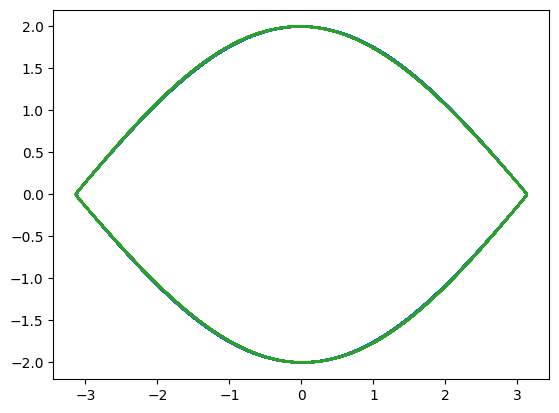

In [53]:
plt.plot(*np.transpose(z_rk4))
plt.plot(*np.transpose(z_sy4))
plt.plot(*np.transpose(z_sy6))

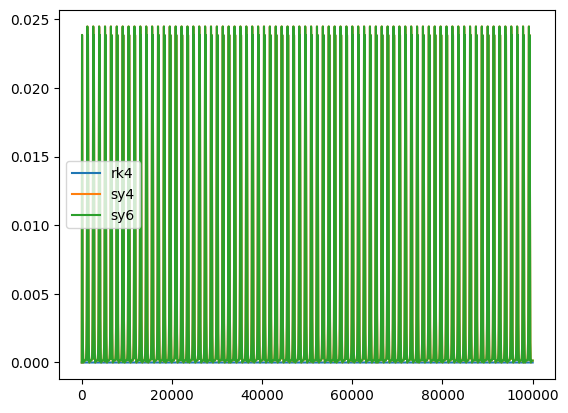

In [54]:
plt.plot([abs(hamiltonian(q, p) - hamiltonian(*z0)) for q, p in z_rk4], label='rk4')
plt.plot([abs(hamiltonian(q, p) - hamiltonian(*z0)) for q, p in z_sy4], label='sy4')
plt.plot([abs(hamiltonian(q, p) - hamiltonian(*z0)) for q, p in z_sy6], label='sy6')
plt.legend()
plt.show()

In [19]:
from dataclasses import dataclass
from typing import Any

@dataclass
class Param:
    value: Any
    vtype: Any

    def set(self, value: Any) -> None:
        self.value = value

In [20]:
H = Param(1, float)
H.value

1

In [22]:
H.value + 2

3

In [17]:
H.__add__(float(H.value), 2.)

__add__


3.0

In [23]:
H.b

b


AttributeError: type object 'float' has no attribute 'b'